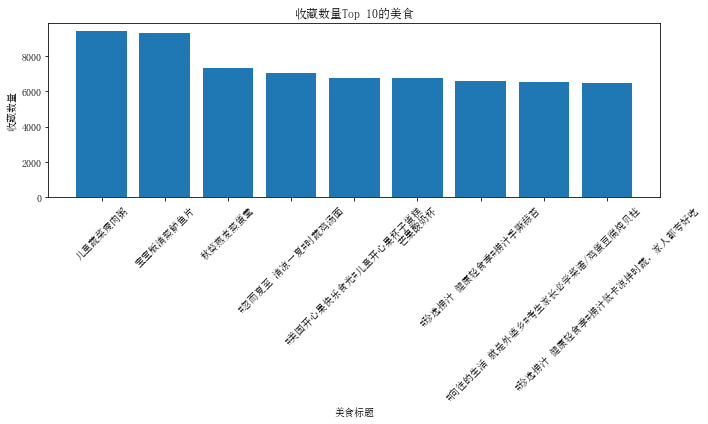

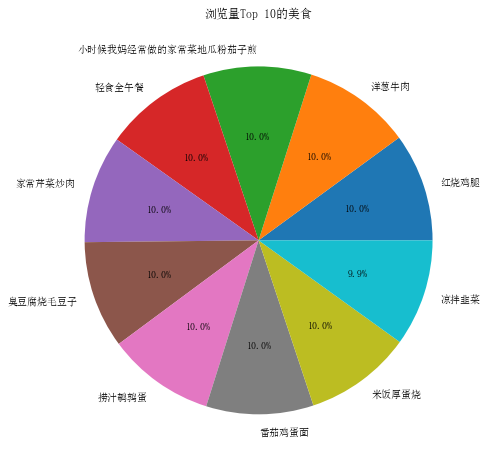

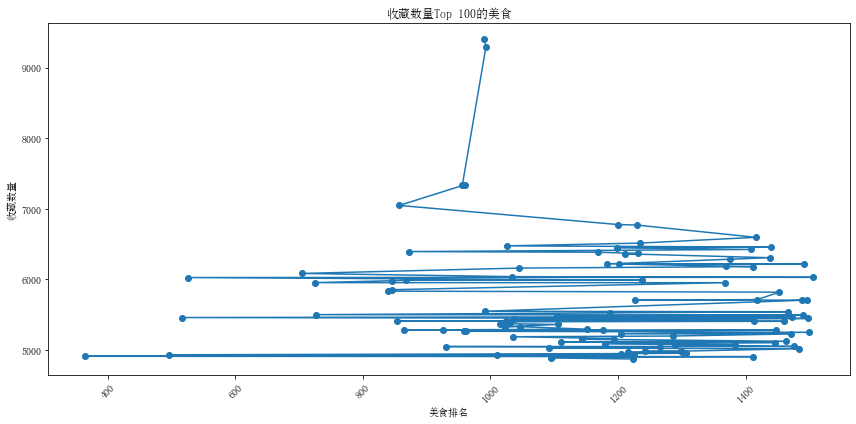

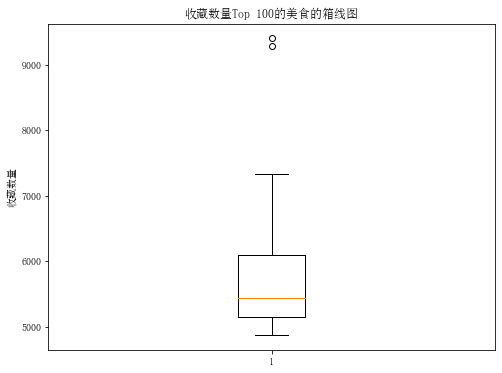

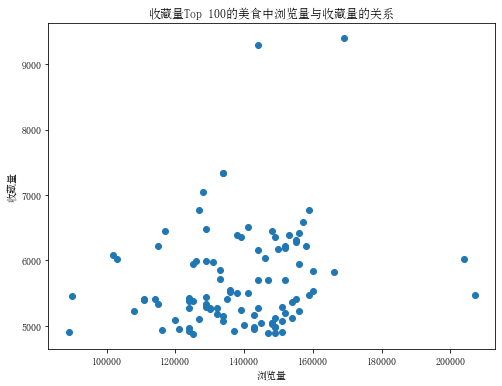

In [4]:
import numpy as np
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置中文字符的字体
font = FontProperties(fname='C:/Windows/Fonts/simsun.ttc', size=12)

# 在绘制图形前设置字体
plt.rcParams['font.family'] = font.get_name()


# 保存数据到CSV文件
with open('recipes.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['标题', '作者', '浏览', '收藏'])
    
    for i in range(63):
        # 发起HTTP请求获取网页内容
        url = 'https://www.douguo.com/jingxuan/{}'.format(i*24)
        headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        # 提取美食相关信息
        recipes = soup.find_all('div', class_='relative')
        
        for recipe in recipes[:-1]:
            title = recipe.find('a', class_='cookname').text.strip()
            author = recipe.find('a', class_='author').text.strip()
            view = recipe.find('span', class_='view').text.strip()
            collect = recipe.find('span', class_='collect').text.strip()

            writer.writerow([title, author, view, collect])

# 读取CSV文件为DataFrame，并更正数据类型
df = pd.read_csv('recipes.csv')
df['收藏'] = pd.to_numeric(df['收藏'], errors='coerce')

# 绘制条形图
top_10_collect = df.nlargest(10, '收藏')
plt.figure(figsize=(10, 6))
plt.bar(top_10_collect['标题'], top_10_collect['收藏'])
plt.xlabel('美食标题')
plt.ylabel('收藏数量')
plt.title('收藏数量Top 10的美食')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 绘制饼图
df['浏览'] = df['浏览'].str.rstrip('万').astype(float) * 10000
top_10_view = df.nlargest(10, '浏览')
plt.figure(figsize=(8, 8))
plt.pie(top_10_view['浏览'], labels=top_10_view['标题'], autopct='%1.1f%%')
plt.title('浏览量Top 10的美食')
plt.show()


# 绘制折线图
top_100_collect = df.nlargest(100, '收藏')
plt.figure(figsize=(12, 6))
plt.plot(top_100_collect.index, top_100_collect['收藏'], marker='o')
plt.xlabel('美食排名')
plt.ylabel('收藏数量')
plt.title('收藏数量Top 100的美食')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 绘制箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(top_100_collect['收藏'])
plt.ylabel('收藏数量')
plt.title('收藏数量Top 100的美食的箱线图')
plt.show()

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(top_100_collect['浏览'], top_100_collect['收藏'])
plt.xlabel('浏览量')
plt.ylabel('收藏量')
plt.title('收藏量Top 100的美食中浏览量与收藏量的关系')
plt.show()
